In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
uni = pd.read_csv('/Users/christophereppig/Datasets/project_5_data/regression/university_train.csv')

In [4]:
uni.shape

(3211, 27)

In [5]:
uni.head()

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,...,RELAFFIL,DISTANCEONLY,UGDS,AGE_ENTRY,FEMALE,MARRIED,DEPENDENT,MD_FAMINC,percent_on_student_loan,id_number
0,Panola College,Carthage,TX,75633-2397,Southern Association of Colleges and Schools C...,1,1,1,2,1,...,-2.0,0.0,2056.0,25.927665,0.706853,0.176396,0.479061,19588.54338,26.05,3756
1,Palo Alto University,Palo Alto,CA,94304-1337,Western Association of Schools and Colleges Se...,1,1,3,4,2,...,-2.0,0.0,194.0,29.712871,0.732673,0.188119,0.306931,18157.66968,68.23,449
2,Quincy University,Quincy,IL,62301-2699,North Central Association of Colleges and Scho...,1,1,3,4,2,...,30.0,0.0,1075.0,21.532362,0.543689,0.061489,0.826861,50437.83939,70.23,1121
3,Fortis College-Orange Park,Orange Park,FL,32065,Accrediting Council for Independent Colleges a...,1,2,1,2,3,...,-2.0,0.0,312.0,29.542683,0.847561,0.288618,0.256098,15967.10174,69.55,5343
4,Southwestern Assemblies of God University,Waxahachie,TX,75165,Southern Association of Colleges and Schools C...,1,1,3,4,2,...,27.0,0.0,1656.0,22.794651,0.475645,0.120344,0.763133,41197.69899,74.29,3782


In [6]:
uni.isnull().sum()

INSTNM                     0
CITY                       0
STABBR                     0
ZIP                        0
ACCREDAGENCY               0
MAIN                       0
NUMBRANCH                  0
PREDDEG                    0
HIGHDEG                    0
CONTROL                    0
LOCALE                     0
CCUGPROF                   0
CCSIZSET                   0
HBCU                       0
PBI                        0
MENONLY                    0
WOMENONLY                  0
RELAFFIL                   0
DISTANCEONLY               0
UGDS                       0
AGE_ENTRY                  0
FEMALE                     0
MARRIED                    0
DEPENDENT                  0
MD_FAMINC                  0
percent_on_student_loan    0
id_number                  0
dtype: int64

In [7]:
uni.dtypes

INSTNM                      object
CITY                        object
STABBR                      object
ZIP                         object
ACCREDAGENCY                object
MAIN                         int64
NUMBRANCH                    int64
PREDDEG                      int64
HIGHDEG                      int64
CONTROL                      int64
LOCALE                     float64
CCUGPROF                   float64
CCSIZSET                   float64
HBCU                       float64
PBI                        float64
MENONLY                    float64
WOMENONLY                  float64
RELAFFIL                   float64
DISTANCEONLY               float64
UGDS                       float64
AGE_ENTRY                  float64
FEMALE                     float64
MARRIED                    float64
DEPENDENT                  float64
MD_FAMINC                  float64
percent_on_student_loan    float64
id_number                    int64
dtype: object

# EDA

### INSTNM
institution name

In [8]:
uni['INSTNM'].head()

0                               Panola College
1                         Palo Alto University
2                            Quincy University
3                   Fortis College-Orange Park
4    Southwestern Assemblies of God University
Name: INSTNM, dtype: object

### City

could use the top few of these

In [9]:
uni['CITY'].value_counts()

Houston          31
Chicago          30
New York         25
San Antonio      23
Springfield      20
Columbia         19
Phoenix          19
Miami            18
Los Angeles      18
San Diego        17
Jacksonville     16
Rochester        16
Nashville        16
Philadelphia     15
Dallas           15
Columbus         15
Denver           15
Cincinnati       14
Indianapolis     14
Sacramento       14
Brooklyn         14
Portland         13
Lancaster        13
Pittsburgh       13
Austin           13
Tulsa            12
Washington       12
Atlanta          12
Minneapolis      12
Orlando          12
                 ..
Hobe Sound        1
Cupertino         1
Slippery Rock     1
Battle Creek      1
Buies Creek       1
Speedway          1
Rolla             1
Stratford         1
Brewton           1
Biloxi            1
MEADVILLE         1
Itta Bena         1
Montevallo        1
Wesson            1
Ormond Beach      1
Claremont         1
Mechanicsburg     1
North Platte      1
Elmhurst          1


### STABBR
state

I could do the top few of these

In [10]:
uni['STABBR'].value_counts().head(20)

CA    309
TX    207
NY    182
FL    170
OH    165
PA    151
IL    112
NC    108
GA     94
PR     86
MO     80
VA     79
MI     77
TN     74
NJ     70
MA     67
MN     67
OK     66
CO     65
AZ     61
Name: STABBR, dtype: int64

### ZIP

probably not enough varition here to bother with

In [11]:
uni['ZIP'].value_counts().head(20)

85021    5
78229    5
00603    4
00961    4
85281    4
80226    4
23462    4
00959    4
37214    3
65807    3
14623    3
16146    3
75234    3
41042    3
93534    3
74145    3
00612    3
12205    3
84107    3
85716    3
Name: ZIP, dtype: int64

### ACCREDAGENCY

accredidation agency

could take the top few of these

In [12]:
uni['ACCREDAGENCY'].value_counts().head(15)

North Central Association of Colleges and Schools The Higher Learning Commission                        643
Southern Association of Colleges and Schools Commission on Colleges                                     476
Middle States Commission on Higher Education                                                            321
National Accrediting Commission of Cosmetology Arts and Sciences                                        315
Accrediting Commission of Career Schools and Colleges                                                   278
Accrediting Council for Independent Colleges and Schools                                                277
Council on Occupational Education                                                                       247
Northwest Commission on Colleges and Universities                                                       100
New England Association of Schools and Colleges Commission on Institutions of Higher Education           99
Western Association of Schoo

### MAIN

1 = main campus

0 = satelite campus

already a dummy variable. keep as-is.

In [13]:
uni['MAIN'].value_counts()

1    2455
0     756
Name: MAIN, dtype: int64

### NUMBRANCH

number of branches, including main branch

could transform or leave as-is

log-transform doesn't help much. there may not be enough variation here to be useful

In [14]:
uni['NUMBRANCH'].describe()

count    3211.000000
mean        3.990346
std         8.351109
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        80.000000
Name: NUMBRANCH, dtype: float64

(array([ 2840.,   192.,    50.,    28.,    87.,     0.,     0.,     0.,
            0.,    14.]),
 array([  1. ,   8.9,  16.8,  24.7,  32.6,  40.5,  48.4,  56.3,  64.2,
         72.1,  80. ]),
 <a list of 10 Patch objects>)

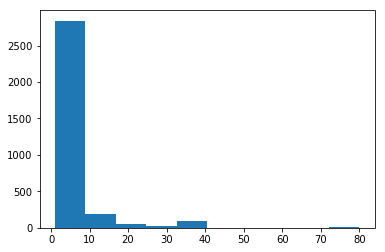

In [15]:
plt.hist(uni['NUMBRANCH'])

(array([ 2133.,   262.,   143.,   186.,   116.,   149.,    71.,   112.,
           25.,    14.]),
 array([ 0.        ,  0.43820266,  0.87640533,  1.31460799,  1.75281065,
         2.19101332,  2.62921598,  3.06741864,  3.50562131,  3.94382397,
         4.38202663]),
 <a list of 10 Patch objects>)

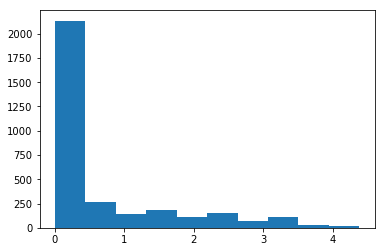

In [16]:
plt.hist(np.log(uni['NUMBRANCH']))

### PREDDEG

Predominant Degree Served

- 0: Not Classified
- 1: Predominantly Certificates
- 2: Predominantly Associates
- 3: Predominantly Bachelors
- 4: Entirely Graduate Degrees

this will need some dummies

In [17]:
uni['PREDDEG'].value_counts()

1    1336
3    1075
2     793
0       7
Name: PREDDEG, dtype: int64

### HIGHDEG

Highest Degree Awarded

- 0: Non-Degree
- 1: Certificate
- 2: Associates
- 3: Bachelors
- 4: Graduate Degrees

these will need dummies

In [18]:
uni['HIGHDEG'].value_counts()

4    949
2    948
1    930
3    372
0     12
Name: HIGHDEG, dtype: int64

### CONTROL

Private/Public Status

- 1: Public
- 2: Private Non-Profit
- 3: Private For-Profit

dummy these

In [19]:
uni['CONTROL'].value_counts()

3    1303
1    1233
2     675
Name: CONTROL, dtype: int64

### LOCALE

Type of Area for College

- 11 City: Large (population of 250,000 or more)
- 12 City: Midsize (population of at least 100,000 but less than 250,000)
- 13 City: Small (population less than 100,000)
- 21 Suburb: Large (outside principal city, in urbanized area with population of 250,000 or more)
- 22 Suburb: Midsize (outside principal city, in urbanized area with population of at least 100,000 but less than 250,000)
- 23 Suburb: Small (outside principal city, in urbanized area with population less than 100,000)
- 31 Town: Fringe (in urban cluster up to 10 miles from an urbanized area)
- 32 Town: Distant (in urban cluster more than 10 miles and up to 35 miles from an urbanized area)
- 33 Town: Remote (in urban cluster more than 35 miles from an urbanized area)
- 41 Rural: Fringe (rural territory up to 5 miles from an urbanized area or up to 2.5 miles from an urban cluster)
- 42 Rural: Distant (rural territory more than 5 miles but up to 25 miles from an urbanized area or more than 2.5 and up to 10 miles from an urban cluster)
- 43 Rural: Remote (rural territory more than 25 miles from an urbanized area and more than 10 miles from an urban cluster)


could bin/dummy into city, suburb, town, rural

could dummy just the most common ones

In [20]:
uni['LOCALE'].value_counts()

 21.0    805
 11.0    723
 13.0    448
 12.0    384
 41.0    203
 32.0    187
 33.0    165
 22.0     81
 31.0     66
 23.0     60
 42.0     55
 43.0     32
-3.0       2
Name: LOCALE, dtype: int64

### CCUGPROF

Carnegie Classification for Undergrad Profile

- -2 Not applicable
- 0 Not classified (Exclusively Graduate)
- 1 Two-year, higher part-time
- 2 Two-year, mixed part/full-time
- 3 Two-year, medium full-time
- 4 Two-year, higher full-time
- 5 Four-year, higher part-time
- 6 Four-year, medium full-time, inclusive, lower transfer-in
- 7 Four-year, medium full-time, inclusive, higher transfer-in
- 8 Four-year, medium full-time, selective, lower transfer-in
- 9 Four-year, medium full-time , selective, higher transfer-in
- 10 Four-year, full-time, inclusive, lower transfer-in
- 11 Four-year, full-time, inclusive, higher transfer-in
- 12 Four-year, full-time, selective, lower transfer-in
- 13 Four-year, full-time, selective, higher transfer-in
- 14 Four-year, full-time, more selective, lower transfer-in
- 15 Four-year, full-time, more selective, higher transfer-in

dummy the most common ones?

In [21]:
uni['CCUGPROF'].value_counts()

-2.0     945
 1.0     336
 11.0    278
 5.0     250
 2.0     249
 13.0    211
 4.0     179
 7.0     169
 3.0     145
 10.0     90
 9.0      90
 14.0     90
 15.0     77
 12.0     58
 6.0      38
 8.0       4
 0.0       2
Name: CCUGPROF, dtype: int64

### CCSIZSET

Carnegie Classification Size and Setting

- -2 Not applicable
- 0 (Not classified)
- 1 Two-year, very small
- 2 Two-year, small
- 3 Two-year, medium
- 4 Two-year, large
- 5 Two-year, very large
- 6 Four-year, very small, primarily nonresidential
- 7 Four-year, very small, primarily residential
- 8 Four-year, very small, highly residential
- 9 Four-year, small, primarily nonresidential
- 10 Four-year, small, primarily residential
- 11 Four-year, small, highly residential
- 12 Four-year, medium, primarily nonresidential
- 13 Four-year, medium, primarily residential
- 14 Four-year, medium, highly residential
- 15 Four-year, large, primarily nonresidential
- 16 Four-year, large, primarily residential
- 17 Four-year, large, highly residential
- 18 Exclusively graduate/professional

could dummy the most common ones

could bin into fewer groups

In [22]:
uni['CCSIZSET'].value_counts()

-2.0     945
 6.0     346
 2.0     272
 1.0     251
 3.0     225
 9.0     143
 12.0    132
 11.0    119
 10.0    118
 13.0    112
 4.0     110
 15.0     93
 16.0     90
 14.0     72
 7.0      57
 8.0      55
 5.0      51
 17.0     20
Name: CCSIZSET, dtype: int64

<Container object of 18 artists>

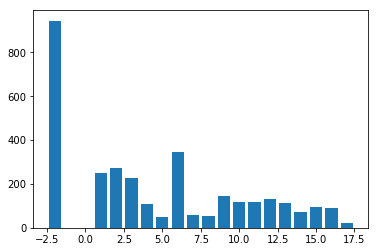

In [23]:
plt.bar(uni['CCSIZSET'].value_counts().index, uni['CCSIZSET'].value_counts().values)

### HBCU

historically black college

already dummy

not much here

In [24]:
uni['HBCU'].value_counts()

0.0    3159
1.0      52
Name: HBCU, dtype: int64

### PBI

predominantly black college

already dummy

also not a lot of variance here

In [25]:
uni['PBI'].value_counts()

0.0    3150
1.0      61
Name: PBI, dtype: int64

### MENONLY

men-only college

already dummy

no information here

In [26]:
uni['MENONLY'].value_counts()

0.0    3211
Name: MENONLY, dtype: int64

### WOMENONLY

women-only college

already dummy

very little variance



In [27]:
uni['WOMENONLY'].value_counts()

0.0    3200
1.0      11
Name: WOMENONLY, dtype: int64

### RELAFFIL

I assume this is religious affiliation

no labels

In [28]:
uni['RELAFFIL'].value_counts().head()

-2.0     2845
 30.0     106
 71.0      40
 54.0      28
 66.0      21
Name: RELAFFIL, dtype: int64

### DISTANCEONLY

distance-only campus

already dummy. not much variance

In [29]:
uni['DISTANCEONLY'].value_counts()

0.0    3193
1.0      18
Name: DISTANCEONLY, dtype: int64

### UGDS

Enrollment of Undergrad degree-seekers

log-transform helps this out a lot

In [30]:
uni['UGDS'].describe()

count     3211.000000
mean      3228.204609
std       6050.558210
min          4.000000
25%        218.000000
50%        805.000000
75%       3228.500000
max      77657.000000
Name: UGDS, dtype: float64

(array([  2.81600000e+03,   2.30000000e+02,   9.90000000e+01,
          3.90000000e+01,   1.30000000e+01,   1.00000000e+01,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  4.00000000e+00,   7.76930000e+03,   1.55346000e+04,
          2.32999000e+04,   3.10652000e+04,   3.88305000e+04,
          4.65958000e+04,   5.43611000e+04,   6.21264000e+04,
          6.98917000e+04,   7.76570000e+04]),
 <a list of 10 Patch objects>)

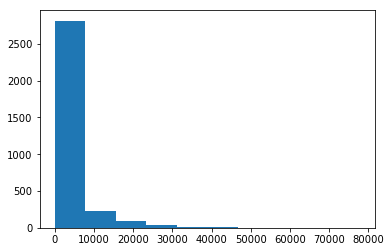

In [31]:
plt.hist(uni['UGDS'])

(array([   2.,   15.,  162.,  589.,  632.,  567.,  557.,  418.,  235.,   34.]),
 array([  1.38629436,   2.37367062,   3.36104688,   4.34842314,
          5.33579941,   6.32317567,   7.31055193,   8.29792819,
          9.28530445,  10.27268071,  11.26005697]),
 <a list of 10 Patch objects>)

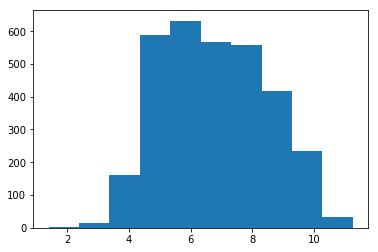

In [32]:
plt.hist(np.log(uni['UGDS']))

### AGE_ENTRY

Age of Entry via Social Security Administration

I'm not exactly sure what this is, but it looks good enough to use

In [33]:
uni['AGE_ENTRY'].describe()

count    3211.000000
mean       26.299659
std         3.638664
min        19.526450
25%        23.704301
50%        26.093496
75%        28.584758
max        50.416136
Name: AGE_ENTRY, dtype: float64

(array([ 542.,  924.,  999.,  545.,  145.,   43.,    6.,    2.,    4.,    1.]),
 array([ 19.52644997,  22.61541856,  25.70438715,  28.79335574,
         31.88232433,  34.97129292,  38.06026152,  41.14923011,
         44.2381987 ,  47.32716729,  50.41613588]),
 <a list of 10 Patch objects>)

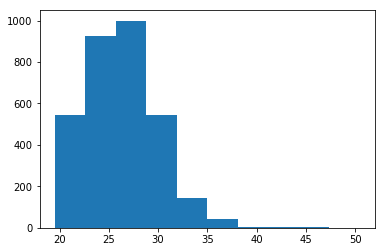

In [34]:
plt.hist(uni['AGE_ENTRY'])

### FEMALE

Share of Female Students via Social Security Administration

could use as-is

In [35]:
uni['FEMALE'].describe()

count    3211.000000
mean        0.648094
std         0.183079
min         0.016109
25%         0.552943
50%         0.630776
75%         0.773373
max         0.984866
Name: FEMALE, dtype: float64

(array([  56.,   49.,   38.,   73.,  235.,  821.,  738.,  487.,  311.,  403.]),
 array([ 0.01610905,  0.11298475,  0.20986046,  0.30673617,  0.40361188,
         0.50048758,  0.59736329,  0.694239  ,  0.79111471,  0.88799042,
         0.98486612]),
 <a list of 10 Patch objects>)

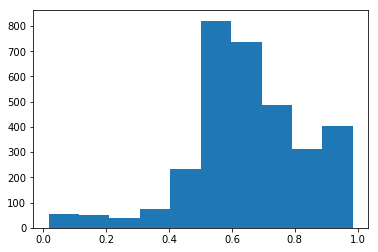

In [36]:
plt.hist(uni['FEMALE'])

### MARRIED

percent of students who are married

sqrt transform makes this pretty good

In [37]:
uni['MARRIED'].describe()

count    3211.000000
mean        0.159274
std         0.093798
min         0.004906
25%         0.091736
50%         0.151102
75%         0.211094
max         0.699746
Name: MARRIED, dtype: float64

(array([ 609.,  889.,  931.,  487.,  193.,   56.,   24.,   11.,    6.,    5.]),
 array([ 0.00490597,  0.07438993,  0.14387388,  0.21335784,  0.2828418 ,
         0.35232576,  0.42180972,  0.49129367,  0.56077763,  0.63026159,
         0.69974555]),
 <a list of 10 Patch objects>)

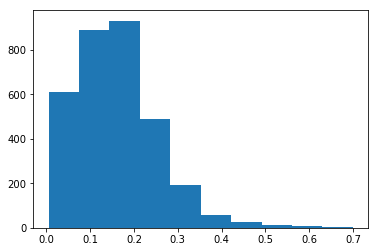

In [38]:
plt.hist(uni['MARRIED'])

(array([   11.,    29.,    80.,   115.,   186.,   442.,   836.,  1139.,
          331.,    42.]),
 array([-5.31730267, -4.82127626, -4.32524984, -3.82922342, -3.33319701,
        -2.83717059, -2.34114418, -1.84511776, -1.34909135, -0.85306493,
        -0.35703851]),
 <a list of 10 Patch objects>)

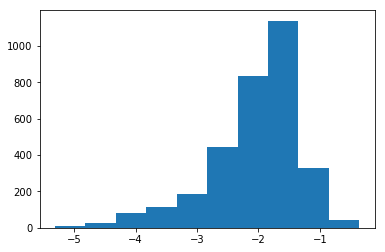

In [39]:
plt.hist(np.log(uni['MARRIED']))

(array([ 116.,  233.,  431.,  691.,  868.,  572.,  217.,   50.,   25.,    8.]),
 array([ 0.07004262,  0.14668915,  0.22333569,  0.29998222,  0.37662875,
         0.45327529,  0.52992182,  0.60656835,  0.68321488,  0.75986142,
         0.83650795]),
 <a list of 10 Patch objects>)

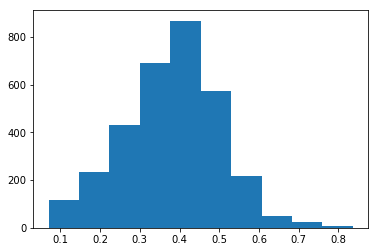

In [40]:
plt.hist(np.sqrt(uni['MARRIED']))

### DEPENDENT

Share of Dependent Students (for tax purposes)

looks okay as-is

In [41]:
uni['DEPENDENT'].describe()

count    3211.000000
mean        0.474823
std         0.232862
min         0.026490
25%         0.286011
50%         0.443627
75%         0.657646
max         0.973310
Name: DEPENDENT, dtype: float64

(array([ 131.,  272.,  552.,  484.,  405.,  373.,  277.,  278.,  267.,  172.]),
 array([ 0.02649007,  0.1211721 ,  0.21585413,  0.31053616,  0.40521819,
         0.49990022,  0.59458225,  0.68926428,  0.78394631,  0.87862834,
         0.97331037]),
 <a list of 10 Patch objects>)

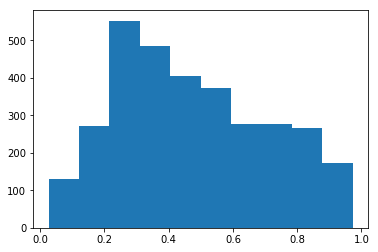

In [42]:
plt.hist(uni['DEPENDENT'])

(array([  16.,  103.,  128.,  291.,  529.,  492.,  474.,  425.,  417.,  336.]),
 array([ 0.16275769,  0.24513842,  0.32751914,  0.40989987,  0.49228059,
         0.57466131,  0.65704204,  0.73942276,  0.82180349,  0.90418421,
         0.98656494]),
 <a list of 10 Patch objects>)

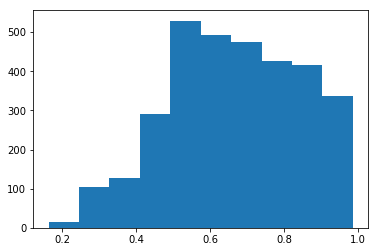

In [43]:
plt.hist(np.sqrt(uni['DEPENDENT']))

### MD_FAMINC

median family income

sqrt transform makes it pretty good

In [44]:
uni['MD_FAMINC'].describe()

count      3211.000000
mean      25783.569563
std       17241.751238
min           0.000000
25%       14678.559890
50%       20107.431720
75%       31428.341740
max      114942.923200
Name: MD_FAMINC, dtype: float64

(array([  310.,  1612.,   578.,   305.,   173.,   119.,    76.,    22.,
            8.,     8.]),
 array([      0.     ,   11494.29232,   22988.58464,   34482.87696,
          45977.16928,   57471.4616 ,   68965.75392,   80460.04624,
          91954.33856,  103448.63088,  114942.9232 ]),
 <a list of 10 Patch objects>)

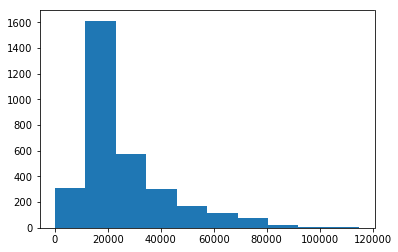

In [45]:
plt.hist(uni['MD_FAMINC'])

(array([   65.,    20.,   117.,  1190.,   903.,   416.,   256.,   165.,
           64.,    15.]),
 array([   0.        ,   33.90323336,   67.80646671,  101.70970007,
         135.61293342,  169.51616678,  203.41940014,  237.32263349,
         271.22586685,  305.12910021,  339.03233356]),
 <a list of 10 Patch objects>)

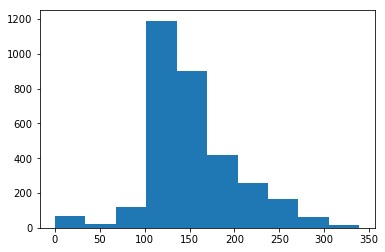

In [46]:
plt.hist(np.sqrt(uni['MD_FAMINC']))

### percent on student loan

the zero-inflation may make this hard to model

In [47]:
uni['percent_on_student_loan'].describe()

count    3211.000000
mean       51.230112
std        28.032078
min         0.000000
25%        30.920000
50%        57.210000
75%        73.035000
max       100.000000
Name: percent_on_student_loan, dtype: float64

(array([ 433.,  158.,  194.,  221.,  303.,  437.,  503.,  467.,  364.,  131.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

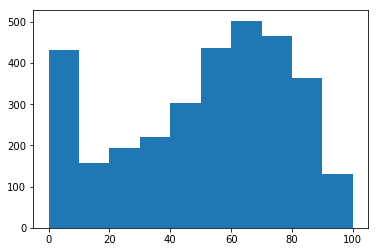

In [48]:
plt.hist(uni['percent_on_student_loan'])

(array([ 289.,   50.,   82.,  117.,  153.,  216.,  364.,  643.,  857.,  440.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

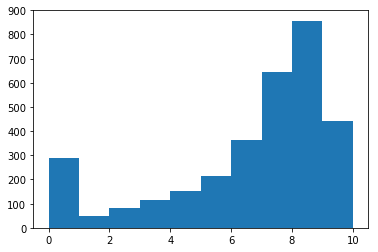

In [49]:
plt.hist(np.sqrt(uni['percent_on_student_loan']))

(array([ 818.,  317.,  353.,  399.,  398.,  316.,  271.,  196.,   86.,   57.]),
 array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
          7000.,   8000.,   9000.,  10000.]),
 <a list of 10 Patch objects>)

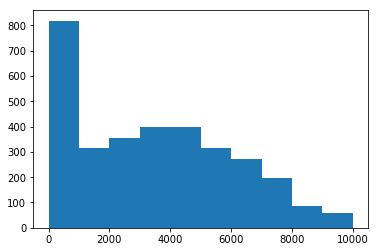

In [50]:
plt.hist(uni['percent_on_student_loan']**2)

In [51]:
uni.columns

Index([u'INSTNM', u'CITY', u'STABBR', u'ZIP', u'ACCREDAGENCY', u'MAIN',
       u'NUMBRANCH', u'PREDDEG', u'HIGHDEG', u'CONTROL', u'LOCALE',
       u'CCUGPROF', u'CCSIZSET', u'HBCU', u'PBI', u'MENONLY', u'WOMENONLY',
       u'RELAFFIL', u'DISTANCEONLY', u'UGDS', u'AGE_ENTRY', u'FEMALE',
       u'MARRIED', u'DEPENDENT', u'MD_FAMINC', u'percent_on_student_loan',
       u'id_number'],
      dtype='object')

# Feature Building

Houston          31
Chicago          30
New York         25
San Antonio      23
Springfield      20
Columbia         19
Phoenix          19
Miami            18
Los Angeles      18
San Diego        17
Jacksonville     16
Rochester        16
Nashville 

In [52]:
for i in ['Houston', 'Chicago', 'New York', 'San Antonio', 'Springfield', 'Colombia', 'Phoenix', 'Miami', 'Los Angeles', 'San Diego', 'Jacksonville', 'Rochester', 'Nashville']:
    uni['in_'+ i] = uni['CITY'].apply(lambda x: 1 if i == x else 0)

In [53]:
for i in ['CA', 'TX', 'NY', 'FL', 'OH', 'PA', 'IL', 'NC', 'GA', 'PR']:
    uni['state_'+i] = uni['STABBR'].apply(lambda x: 1 if 1==x else 0)

In [54]:
agencies = ['North Central Association of Colleges and Schools', 'Southern Association of Colleges and Schools Commission on Colleges',
           'Middle States Commission on Higher Education', 'National Accrediting Commission of Cosmetology Arts and Sciences',
           'Accrediting Commission of Career Schools and Colleges', 'Accrediting Council for Independent Colleges and Schools',
           'Council on Occupational Education']
for i in zip(range(len(agencies)), agencies):
    uni['accredited_'+str(i[0])] = uni['ACCREDAGENCY'].apply(lambda x: 1 if i[1] in x else 0)

In [ ]:
uni.columns

# Setting x and y

In [55]:
x = uni[['in_Houston', u'in_Chicago', u'in_New York',
       u'in_San Antonio', u'in_Springfield', u'in_Colombia', u'in_Phoenix',
       u'in_Miami', u'in_Los Angeles', u'in_San Diego', u'in_Jacksonville',
       u'in_Rochester', u'in_Nashville', u'state_CA', u'state_TX', u'state_NY',
       u'state_FL', u'state_OH', u'state_PA', u'state_IL', u'state_NC',
       u'state_GA', u'state_PR', u'accredited_0', u'accredited_1',
       u'accredited_2', u'accredited_3', u'accredited_4', u'accredited_5',
       u'accredited_6', 'MAIN', 'NUMBRANCH', 'AGE_ENTRY', 'MARRIED', 'DEPENDENT', 'MD_FAMINC',
        'FEMALE', 'UGDS']]
y = uni['percent_on_student_loan']

x_train, x_test, y_train, y_test = train_test_split(x,y)

# Modeling

In [64]:

lr = LinearRegression()
rf = RandomForestRegressor(min_samples_leaf=6)
et = ExtraTreesRegressor(min_samples_leaf=4)
ab = AdaBoostRegressor(n_estimators=100, base_estimator=rf)
gb = GradientBoostingRegressor(max_depth=6)
dt = DecisionTreeRegressor(min_samples_leaf=10)

In [57]:
def run_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print "Training set score: ", model.score(x_train, y_train)
    print "Test set score: ", model.score(x_test, y_test)
    plt.scatter(y_test, predictions, marker='x', s=1, alpha=0.5)
    plt.title('Predictions vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

Training set score:  0.668945365775
Test set score:  0.397691253498


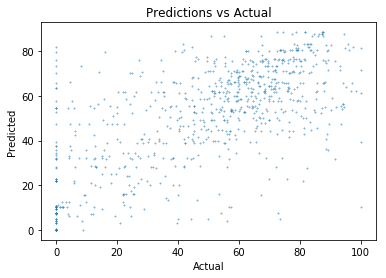

In [65]:
run_model(x_train, y_train, x_test, y_test, dt)

Model:  LinearRegression
Hyperparameters: copy_X=True, fit_intercept=True, n_jobs=1, normalize=False
Training set score:  0.311369544364
Test set score:  0.302060268222


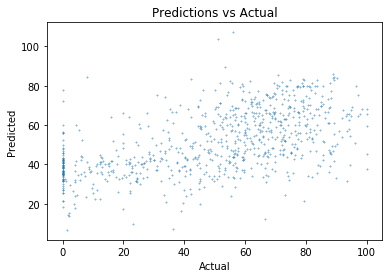



Model:  RandomForestRegressor
Hyperparameters: bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False
Training set score:  0.73802351925
Test set score:  0.519173408226


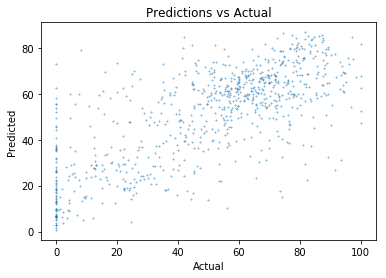



Model:  ExtraTreesRegressor
Hyperparameters: bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=4,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False
Training set score:  0.778058761292
Test set score:  0.531744834698


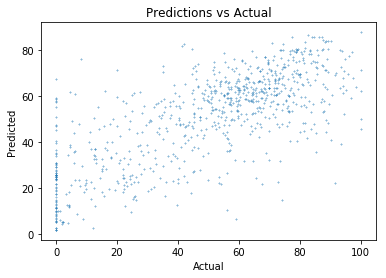



Model:  GradientBoostingRegressor
Hyperparameters: alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False
Training set score:  0.872331225566
Test set score:  0.527459636559


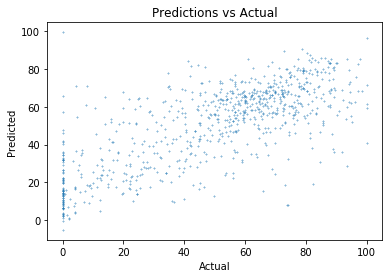



Model:  AdaBoostRegressor
Hyperparameters: base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=None
Training set score:  0.869238949886
Test set score:  0.525531418735


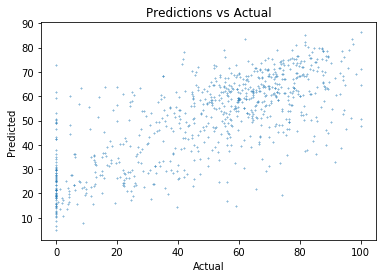



Model:  DecisionTreeRegressor
Hyperparameters: criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'
Training set score:  0.99997214865
Test set score:  0.161343009733


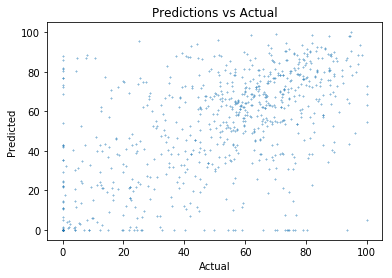

In [61]:
models = [lr, rf, et, gb, ab, dt]
for model in models:
    print "Model: ", str(model).split("(")[0]
    print "Hyperparameters: " + str(model)[len(str(model).split("(")[0])+1:-1]
    run_model(x_train, y_train, x_test, y_test, model)
    print "\n"

In [62]:
## transforms columns

def transform(df):
    newdf = df
    for i in ['Houston', 'Chicago', 'New York', 'San Antonio', 'Springfield', 'Colombia', 'Phoenix', 'Miami', 'Los Angeles', 'San Diego', 'Jacksonville', 'Rochester', 'Nashville']:
        newdf['in_'+ i] = newdf['CITY'].apply(lambda x: 1 if i == x else 0)
    for i in ['CA', 'TX', 'NY', 'FL', 'OH', 'PA', 'IL', 'NC', 'GA', 'PR']:
        newdf['state_'+i] = newdf['STABBR'].apply(lambda x: 1 if 1==x else 0)
    agencies = ['North Central Association of Colleges and Schools', 'Southern Association of Colleges and Schools Commission on Colleges',
           'Middle States Commission on Higher Education', 'National Accrediting Commission of Cosmetology Arts and Sciences',
           'Accrediting Commission of Career Schools and Colleges', 'Accrediting Council for Independent Colleges and Schools',
           'Council on Occupational Education']
    for i in zip(range(len(agencies)), agencies):
        newdf['accredited_'+str(i[0])] = newdf['ACCREDAGENCY'].apply(lambda x: 1 if i[1] in x else 0)
    return newdf

## sets x's
    
def set_x(df):
    return df[['in_Houston', u'in_Chicago', u'in_New York',
       u'in_San Antonio', u'in_Springfield', u'in_Colombia', u'in_Phoenix',
       u'in_Miami', u'in_Los Angeles', u'in_San Diego', u'in_Jacksonville',
       u'in_Rochester', u'in_Nashville', u'state_CA', u'state_TX', u'state_NY',
       u'state_FL', u'state_OH', u'state_PA', u'state_IL', u'state_NC',
       u'state_GA', u'state_PR', u'accredited_0', u'accredited_1',
       u'accredited_2', u'accredited_3', u'accredited_4', u'accredited_5',
       u'accredited_6', 'MAIN', 'NUMBRANCH', 'AGE_ENTRY', 'MARRIED', 'DEPENDENT', 'MD_FAMINC',
        'FEMALE', 'UGDS']].copy()

## sets y

def set_y(df):
    return df['percent_on_student_loan'].copy()

## instantiates and trains model, creates predictions

def get_predictions(train_x, train_y, x_test):
    new_x_test = x_test
    rf = RandomForestRegressor(min_samples_leaf=6)
    ab = AdaBoostRegressor(n_estimators=100, base_estimator=rf)    
    ab.fit(train_x, train_y)
    new_x_test['predictions'] = ab.predict(x_test)
    return new_x_test

## builds submission file and exports it as .csv

def submission_file(x_test, original_x_test):
    x_test['INSTNM'] = original_x_test['INSTNM']
    submission = x_test[['INSTNM','predictions']]
    submission.to_csv('submission_regression.csv', encoding='utf-8', index=False)

## combines all functions

def pipeline(train_df, test_df):
    transformed_train = transform(train_df)
    transformed_test = transform(test_df)
    x_train = set_x(transformed_train)
    y_train = set_y(transformed_train)
    x_test = set_x(transformed_test)
    with_predictions = get_predictions(x_train, y_train, x_test)
    submission_file(with_predictions, test_df)

In [63]:
train_uni = pd.read_csv('/Users/christophereppig/Datasets/project_5_data/regression/university_train.csv')
test_uni = pd.read_csv('/Users/christophereppig/Datasets/project_5_data/regression/university_test.csv')

In [66]:
pipeline(train_uni, test_uni)